In [ ]:
!pip install rebound


In [ ]:
!pip install reboundx

In [ ]:
#Imports
import rebound
import reboundx
import numpy as np
import matplotlib.pyplot as plt
from reboundx import constants
from scipy.interpolate import interp1d

params = {'legend.fontsize': 'xx-large',
          'figure.titlesize': 'xx-large',
          'figure.subplot.top': 0.93,
          'figure.subplot.wspace': 0.3,
          'figure.figsize': (7,6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}

plt.rcParams.update(params)

In [ ]:
sim = rebound.Simulation()
sim.units = ('days', 'km', 'kg')

In [ ]:
tmax = 5#in days
time_step = (60/86400)#in days# everyday 8hrs tracking in every 60sec
samp = ((8/24)/time_step)#per day how many data sample
Nout = round(samp*tmax)#how many sample in 5 days
print(Nout)

2400


In [ ]:
round(((8/24)/(60/86400))*5)

2400

In [ ]:
#Common parameters
Nobj = 8#considering 3 planets, sun, Bepi, 3 asteriods
year = 365 #in days
tmax = 10 #days
# Nout = int(3*tmax) #per day 3 time samples in 8 hr integration time upto 2 years
time_step = (60/86400) #in days# everyday 8hrs tracking in every 60sec
samp = ((8/24)/time_step)#per day how many data sample
Nout = round(samp*tmax)#how many sample in 5 days
#Nout = int(480*tmax)
print(Nout)
sim.c = 3e5*86400 #km/day light speed
c2 = sim.c**2
cm2 = 1/c2
sim.G = 6.67430e-20*(86400**2) #gravitational constant km3 kg-1 days-2
times = np.linspace(0, tmax, Nout)

Jcentury = 36525 #days
arcsec = 4.8481368e-06 #in rad
period_mercury= 88 #days

4800


In [ ]:
#uncertainty values defined
dx = 0.1 #km
dy = 0.1
dz = 0.1
#dx , dy, dz same for earth and mercury
dvx = 0.0001*86400 #km/days
dvy = 0.0001*86400
dvz = 0.0001*86400
#same for earth and mercury
dj2 = 1e-8
dbet = 1e-5
dgam = 1e-5
bet = 1
gam = 1


mercury_x= 46088671.22889903
mercury_y= 17423615.515467957
mercury_z= -2742278.1329949
mercury_vx= -27.278071481898525
mercury_vy= 47.50246889781066
mercury_vz= 6.38427653379923

earth_x= 116535299.24682154
earth_y= 91090203.7090667
earth_z= 7002.7180410809815
earth_vx= -18.886395720072205
earth_vy= 23.305303655847617
earth_vz= -0.000608065810169478

bepi_x= 46061192.175843544
bepi_y= 17252752.368236057
bepi_z= -2736191.7237738287
bepi_vx= -27.057110127709606
bepi_vy= 47.26234809792773
bepi_vz= 6.404299380352967


In [ ]:
# #defining simulation setup
# def setupsim():
# 	sim = rebound.Simulation()
# 	sim.units = ('days', 'km', 'kg')
# 	sim.add(m = 1.989e30, hash = "sun")
# 	# sim.add(m = 3.285e23, x=49499776.82069295, y=-33332090.081709605, z=-7203457.823496873, vx=17.14724158142263*86400, vy=42.98081670808874*86400, vz=1.9402420218504748*86400, hash = "mercury")
# 	sim.add(m = 3.285e23, x=mercury_x, y=mercury_y, z=mercury_z, vx=mercury_vx*86400, vy=mercury_vy*86400, vz=mercury_vz*86400, hash = "mercury")
# 	sim.add(m = 1150, x=49673275.327082016, y=-33268021.38113002, z=-7200954.995758239, vx=16.886487529119044*86400, vy=43.21820603265886*86400, vz=1.9329934549900312*86400, hash = "bepi")

# 	#sim.add(m= 4.867e24, x=99056416.04662599, y=42658515.05341787,z=-5114738.725606915,vx=-14.143052389070228, vy=31.934908515297447,vz=1.2551784587941217, hash='Venus')
# 	sim.add(m= 5.972e24, x=133539638.73838262, y=64968127.88008125,z=9090.368434660137,vx=-13.622802438996763*86400, vy=26.61811665489768*86400,vz=-0.0028125020290747926*86400, hash='Earth')
# 	#sim.add(m=6.39e23, hash='Mars')
# 	sim.add(m=1.898e27, a=1.0704e6, e=0.0014, hash="jupiter")
# 	#sim.add(m=5.683e26, hash='Saturn')
# 	#sim.add(m=8.681e25, hash='Uranus')
# 	#sim.add(m=1.024e26, hash='Neptune')
# 	sim.add(m=9.1e20, hash='Ceres')
# 	sim.add(m=2.108e20, hash='Pallas')
# 	sim.add(m=2.589e20, hash='Vesta')

# 	return sim


In [ ]:
#defining simulation setup
def setupsim():
	sim = rebound.Simulation()
	sim.units = ('days', 'km', 'kg')
	sim.add(m = 1.989e30, hash = "sun")
	# sim.add(m = 3.285e23, x=49499776.82069295, y=-33332090.081709605, z=-7203457.823496873, vx=17.14724158142263*86400, vy=42.98081670808874*86400, vz=1.9402420218504748*86400, hash = "mercury")
	sim.add(m = 3.285e23, x=mercury_x, y=mercury_y, z=mercury_z, vx=mercury_vx*86400, vy=mercury_vy*86400, vz=mercury_vz*86400, hash = "mercury")
	sim.add(m = 1150, x=bepi_x, y=bepi_y, z=bepi_z, vx=bepi_vx*86400, vy=bepi_vy*86400, vz=bepi_vz*86400, hash = "bepi")

	#sim.add(m= 4.867e24, x=99056416.04662599, y=42658515.05341787,z=-5114738.725606915,vx=-14.143052389070228, vy=31.934908515297447,vz=1.2551784587941217, hash='Venus')
	# sim.add(m= 5.972e24, x=133539638.73838262, y=64968127.88008125,z=9090.368434660137,vx=-13.622802438996763*86400, vy=26.61811665489768*86400,vz=-0.0028125020290747926*86400, hash='Earth')
	sim.add(m= 5.972e24, x=earth_x, y=earth_y,z=earth_z,vx=earth_vx*86400, vy=earth_vy*86400,vz=earth_vz*86400, hash='Earth')
	sim.add(m=1.898e27, a=1.0704e6, e=0.0014, hash="jupiter")
	#sim.add(m=5.683e26, hash='Saturn')
	#sim.add(m=8.681e25, hash='Uranus')
	#sim.add(m=1.024e26, hash='Neptune')
	sim.add(m=9.1e20, hash='Ceres')
	sim.add(m=2.108e20, hash='Pallas')
	sim.add(m=2.589e20, hash='Vesta')

	return sim

In [ ]:
def PPN_J(reb_sim, particles, force, dt): #, particles, force, dt):#refers to GR
    c = 3e5*86400 #km/day
    #ps = particles
    c2 = c**2
    cm2 = 1/c2
    G = 6.67430e-20*(86400**2) #km^3 kg^-1 days^-2
    gam = 1.
    bet = 1.
    r_vect = np.zeros((Nobj,Nobj,3))
    r2 = np.zeros((Nobj,Nobj))
    r = np.zeros((Nobj,Nobj))
    newt = np.zeros((Nobj,Nobj,3))
    mu = np.zeros(Nobj)
    v2 = np.zeros(Nobj)
    v_dot_v = np.zeros((Nobj,Nobj))
    r_dot_a = np.zeros((Nobj,Nobj))
    r_dot_vt = np.zeros((Nobj,Nobj))
    r_dot_va = np.zeros((Nobj,Nobj))
    for i in range(0,Nobj):
        mu[i] = G*ps[i].m
        v2[i] = ps[i].vx**2 + ps[i].vy**2 + ps[i].vz**2
    for i in range(0,Nobj):
        for j in range(0,Nobj):
            if (j!=i):
                r_vect[i,j,0] = ps[j].x-ps[i].x
                r_vect[i,j,1] = ps[j].y-ps[i].y
                r_vect[i,j,2] = ps[j].z-ps[i].z
                r_vect[j,i,0] = -r_vect[i,j,0]
                r_vect[j,i,1] = -r_vect[i,j,1]
                r_vect[j,i,2] = -r_vect[i,j,2]
                r2[i,j] = r_vect[i,j,0]**2 + r_vect[i,j,1]**2 + r_vect[i,j,2]**2
                r2[j,i] = r2[i,j]
                r[i,j] = np.sqrt(r2[i,j])
                r[j,i] = r[i,j]
                newt[i,j,0] = mu[i]*r_vect[i,j,0]/(r2[i,j]*r[i,j])
                newt[i,j,1] = mu[i]*r_vect[i,j,1]/(r2[i,j]*r[i,j])
                newt[i,j,2] = mu[i]*r_vect[i,j,2]/(r2[i,j]*r[i,j])
                #(1/2*(lam**2))*(mu[i]*r_vect[i, j, 0]/r[i,j])#x
                #(1/2*(lam**2))*(mu[i]*r_vect[i, j, 1]/r[i,j])#y
                #(1/2*(lam**2))*(mu[i]*r_vect[i, j, 2]/r[i,j])#z
                v_dot_v[i,j] = ps[i].vx*ps[j].vx + ps[i].vy*ps[j].vy + ps[i].vz*ps[j].vz
                r_dot_a[i,j] = r_vect[i,j,0]*ps[i].ax + r_vect[i,j,1]*ps[i].ay + r_vect[i,j,2]*ps[i].az
                r_dot_vt[i,j] = r_vect[i,j,0]*ps[j].vx + r_vect[i,j,1]*ps[j].vy + r_vect[i,j,2]*ps[j].vz
                r_dot_va[i,j] = r_vect[i,j,0]*ps[i].vx + r_vect[i,j,1]*ps[i].vy + r_vect[i,j,2]*ps[i].vz
    for i in range(0,Nobj):
        for j in range(0,Nobj):
            if (j!=i):
                ps[j].ax += cm2* (-newt[i,j,0] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vx-ps[i].vx)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].ax/r[i,j])
                ps[j].ay += cm2* (-newt[i,j,1] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vy-ps[i].vy)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].ay/r[i,j])
                ps[j].az += cm2* (-newt[i,j,2] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
                                                  - 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
                                  + mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
                                                             - (1+2*gam)*r_dot_va[i,j])*(ps[j].vz-ps[i].vz)
                                  + 0.5*(3+4*gam)*mu[i]*ps[i].az/r[i,j])
                for b in range(0,Nobj):
                    if (b!=j):
                        ps[j].ax += cm2* (newt[i,j,0]*2*(gam+bet)*mu[b]/r[j,b])
                        ps[j].ay += cm2* (newt[i,j,1]*2*(gam+bet)*mu[b]/r[j,b])
                        ps[j].az += cm2* (newt[i,j,2]*2*(gam+bet)*mu[b]/r[j,b])
                    if (b!=i):
                        ps[j].ax += cm2* (newt[i,j,0]*(2*bet-1)*mu[b]/r[i,b])
                        ps[j].ay += cm2* (newt[i,j,1]*(2*bet-1)*mu[b]/r[i,b])
                        ps[j].az += cm2* (newt[i,j,2]*(2*bet-1)*mu[b]/r[i,b])


In [ ]:
sim = setupsim()
sim.integrator = "whfast"
sim.move_to_com()
ps = sim.particles


In [ ]:
import reboundx
rebx = reboundx.Extras(sim)
gh = rebx.load_force("gravitational_harmonics")
rebx.add_force(gh)
ps["sun"].params["J2"] = 2.2e-7
ps["sun"].params["R_eq"] = 695700

ppn = rebx.create_force("ppn")
ppn.force_type = "vel" #velocity dependent
ppn.update_accelerations = PPN_J
rebx.add_force(ppn)

sim.force_is_velocity_dependent = 1

In [ ]:
rho = np.zeros(Nout)
BE = np.zeros(Nout)
BM = np.zeros(Nout)
print("loop starting")
from tqdm import tqdm
for i,time in tqdm(enumerate(times)):
    sim.integrate(time)
    # print(i)
    rho[i] = np.sqrt((ps[1].x-ps[3].x)**2+(ps[1].y-ps[3].y)**2+(ps[1].z-ps[3].z)**2)#mercury-earth distance
    BE = np.sqrt((ps[3].x)**2+(ps[3].y)**2+(ps[3].z)**2) #earth distance from barycenter
    BM = np.sqrt((ps[1].x)**2+(ps[1].y)**2+(ps[1].z)**2)#mercury distance from barycenter


print("loop done")


loop starting


0it [00:00, ?it/s]/usr/local/lib/python3.10/dist-packages/rebound/simulation.py:259: RuntimeWarning: WHFast convergence issue. Timestep is larger than at least one orbital period.
  warnings.warn(msg[1:], RuntimeWarning)
4800it [04:06, 19.49it/s]

loop done


In [ ]:
print(rho)

[1.01965936e+08 1.01963803e+08 1.01961670e+08 ... 1.13332958e+08
 1.13339645e+08 1.13346333e+08]


In [ ]:
print(len(rho))
rho_new = rho

4800


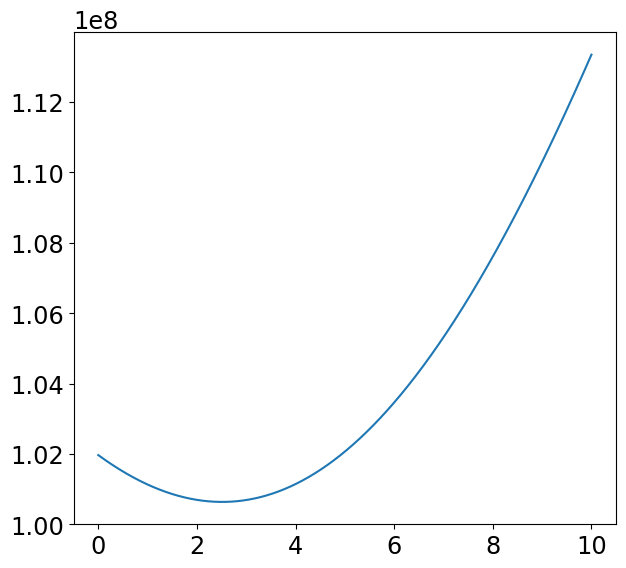

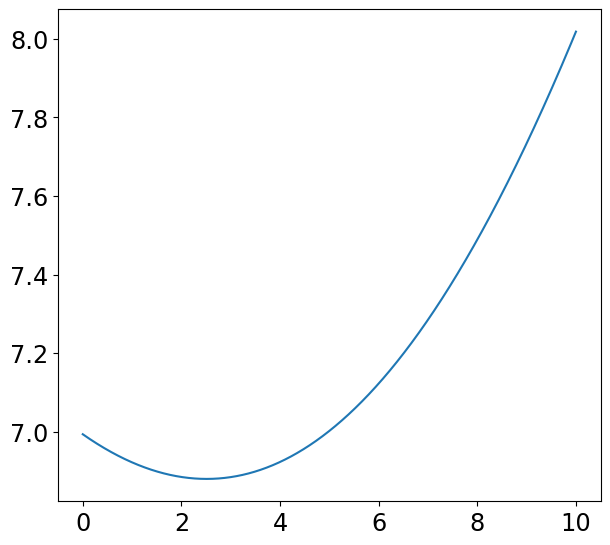

In [ ]:
plt.plot(times,rho)
plt.show()
plt.plot(times, rho_shap-rho)
plt.show()

In [ ]:
EM = rho#earth-mercury distance
c = 3e5*86400
#now we are considering the shapiro delay
def shapiro(BE,BM,EM):
	upp=BE+BM+EM
	low=BE+BM-EM
	G = 6.67430e-20*(86400**2)
	c = 3e5*86400
	m = 1.989e30
	gam=1
	T1=np.log(upp/low)
	shc=2*(1+gam)*(G*m)/(c**3)
	delay=shc*T1#shapiro time delay
	return delay

shap_gr = shapiro(BE, BM, EM)#shapiro delay due to sun
shap_d = c*shap_gr#shapiro time delay distance
rho_shap = EM+shap_d #adding the effect of the shapiro delay to the earth-mercury distance, PPN, Sun J2#rho_IC without adding any uncertainty to the positions, velocity, beta, gamma , J2
print(rho_shap)#consider shapiro delay tooo !!
print("''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''", rho)
print("'''''''''''''''''''''''''''''''''''''''''''''''''''''''''", rho_shap-rho)

[1.01965943e+08 1.01963810e+08 1.01961677e+08 ... 1.13332966e+08
 1.13339653e+08 1.13346341e+08]
'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''' [1.01965936e+08 1.01963803e+08 1.01961670e+08 ... 1.13332958e+08
 1.13339645e+08 1.13346333e+08]
''''''''''''''''''''''''''''''''''''''''''''''''''''''''' [6.99386784 6.99368474 6.99350175 ... 8.01680779 8.01744038 8.01807313]


In [ ]:
rho_shap_new = rho_shap


## *The things that we have to do is the following: *

1.   so first we need to calculate rho and doppler taking into account PPN, Sun J2 and shapiro delay
2. doppler can be computed using this formula: (rho(t+60sec)-rho(t))/60 sec
3.  now we have earth coordinates+velocities, mercury coordinates+velocities = 12 parameters, beta, gama, J2 = total 15 parameters
4. so we need to compute partial derivatives for rho and for dopler for each 15 parameters
5. partial can be computed as $\frac{rho_shap(IC+delta IC)-rho_shap(IC-delta IC)}{2 \times delta IC}$ ; same for dopler where IC is initial conditions (here 15 parameters)
for the doppler, we already calculated doppler using rho_shap so for the doppler one the formula would be :$\frac{dopler_{value}(IC+delta IC)-dopler_{value}(IC-delta IC)}{2 \times delta IC}$, use the definition code that we generated for calculating the dopler.
6. now we have to make the jacobian_range and jacobian_dopler
7. for jacobian_range = [mth row x nth column] where m is no. of observations
and n is parameters here 15; same for dopler
8. we have W matrix which is diagonal with $\sigma^2$ in the diagonal
9. now compute the covariance, $C = (J^T W J)^{-1}$
10. from covariance, estimating the precision of the parameters by extracting the diagonal values







In [ ]:
# (rho*( t + (60/86400)) - rho(t) ) / (60/86400)

In [ ]:
rho_shap

array([1.29528586e+08, 1.29522736e+08, 1.29516887e+08, ...,
       1.04570446e+08, 1.04566850e+08, 1.04563256e+08])

In [ ]:
# rho(1+60s). - rho(1)

In [ ]:
def doppler_func():
  '''
  rho->i+1 and rho
  '''
  doppler_val = []
  for i in range(len(rho_shap)-1):
    doppler_val.append(86400*(rho_shap[i+1]-rho_shap[i])/60)

  return doppler_val

print("loop done")
dop = doppler_func()
print(dop)

loop done
[-8421997.82630682, -8422013.184120655, -8422028.383169174, -8422043.422679901, -8422058.302373886, -8422073.02233696, -8422087.582354546, -8422101.98255539, -8422116.222639084, -8422130.302605629, -8422144.22249794, -8422157.982144356, -8422171.581480503, -8422185.02052784, -8422198.299050331, -8422211.417155266, -8422224.374713898, -8422237.171618938, -8422249.80784893, -8422262.283360958, -8422274.598047733, -8422286.751909256, -8422298.744859695, -8422310.576834679, -8422322.24779129, -8422333.757686615, -8422345.10645628, -8422356.294035912, -8422367.320446968, -8422378.185539246, -8422388.889312744, -8422399.431638718, -8422409.812645912, -8422420.032119751, -8422430.090038776, -8422439.986445904, -8422449.721233845, -8422459.294230938, -8422468.705544472, -8422477.955152988, -8422487.042841911, -8422495.968589783, -8422504.732482433, -8422513.334326744, -8422521.774058342, -8422530.051698685, -8422538.167119026, -8422546.120319366, -8422553.911192417, -8422561.53963089

In [ ]:
def doppler_func(rho_shap):
  '''
  rho->i+1 and rho
  '''
  doppler_val = []
  for i in range(len(times) - 1): # Iterate using integers instead of floating-point numbers from times
    doppler_val.append((rho_shap[i+1]-rho_shap[i])/time_step)

  return doppler_val

print("loop done")

loop done


In [ ]:
# doppler_value = doppler_func()
# print(doppler_value)

[-8421997.82630682, -8422013.184120655, -8422028.383169174, -8422043.422679901, -8422058.302373886, -8422073.02233696, -8422087.582354546, -8422101.98255539, -8422116.222639084, -8422130.302605629, -8422144.22249794, -8422157.982144356, -8422171.581480503, -8422185.02052784, -8422198.299050331, -8422211.417155266, -8422224.374713898, -8422237.171618938, -8422249.80784893, -8422262.283360958, -8422274.598047733, -8422286.751909256, -8422298.744859695, -8422310.576834679, -8422322.24779129, -8422333.757686615, -8422345.10645628, -8422356.294035912, -8422367.320446968, -8422378.185539246, -8422388.889312744, -8422399.431638718, -8422409.812645912, -8422420.032119751, -8422430.090038776, -8422439.986445904, -8422449.721233845, -8422459.294230938, -8422468.705544472, -8422477.955152988, -8422487.042841911, -8422495.968589783, -8422504.732482433, -8422513.334326744, -8422521.774058342, -8422530.051698685, -8422538.167119026, -8422546.120319366, -8422553.911192417, -8422561.53963089, -8422569

In [ ]:
# doppler_value

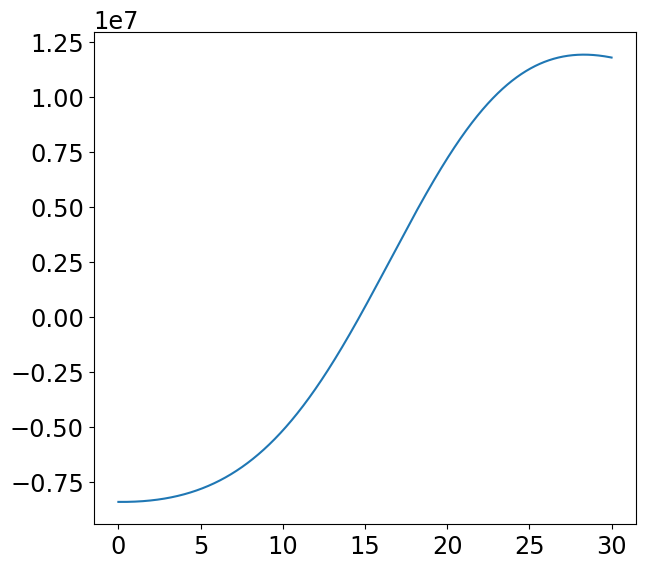

In [ ]:
plt.plot(times[:-1], doppler_value)
plt.xlabel("Time (days)")
plt.ylabel("Doppler Shift (km/day)")
plt.title("Doppler Shift vs Time")
plt.grid(True)
plt.show()

In [ ]:
import pickle as pkl

In [ ]:

def save_data_to_pickle(filename, data):
    with open(filename, 'wb') as file:
        pkl.dump(data, file)

def load_data_from_pickle(filename):
    with open(filename, 'rb') as file:
        data = pkl.load(file)
    return data


# Running simulation with deviations


In [ ]:
#uncertainty values defined
dx = 0.1 #km
dy = 0.1
dz = 0.1
#dx , dy, dz same for earth and mercury
dvx = 0.0001*86400 #km/days
dvy = 0.0001*86400
dvz = 0.0001*86400
#same for earth and mercury
dj2 = 1e-8
dbet = 1e-5
dgam = 1e-5
bet = 1
gam = 1

# difference
dx_values = {'earth_x':dx,'earth_y':dy,'earth_z':dz,'earth_vx':dvx,'earth_vy':dvy,'earth_vz':dvz,'mercury_x':dx,'mercury_y':dy,'mercury_z':dz,'mercury_vx':dvx,'mercury_vy':dvy,'mercury_vz':dvz,'j2':dj2,'beta':dbet,'gamma':dgam}
# initial params
# ic_params = {"earth_x": 133539638.73838262, "earth_y": 64968127.88008125, "earth_z":9090.368434660137, "earth_vx":-13.622802438996763*86400, "earth_vy":26.61811665489768*86400,"earth_vz":-0.0028125020290747926*86400,
#                 "mercury_x":49499776.82069295, "mercury_y":  -33332090.081709605 , "mercury_z":  -7203457.823496873 , "mercury_vx": 17.14724158142263*86400 , "mercury_vy": 42.98081670808874*86400  , "mercury_vz":1.9402420218504748*86400,
#                 "gamma": 1, "beta": 1, "j2": 2.2e-7}

## function which runs to compute rho and rho_shap with deviations
def compute_partial():

	for key in dx_values:
		# refresh the values
		xc_params = {"earth_x": earth_x, "earth_y": earth_y, "earth_z":earth_z, "earth_vx":earth_vx*86400, "earth_vy":earth_vy*86400,"earth_vz":earth_vz*86400,
                "mercury_x":mercury_x, "mercury_y":  mercury_y , "mercury_z":  mercury_z , "mercury_vx": mercury_vx*86400 , "mercury_vy": mercury_vy*86400  , "mercury_vz":mercury_vz*86400,
                "gamma": 1, "beta": 1, "j2": 2.2e-7}
		xc_params[key]  = xc_params[key] - dx_values[key] ## change this for addition
		print(xc_params)
		print("---||||---")
		sim = rebound.Simulation()
		sim.units = ('days', 'km', 'kg')
		sim.add(m = 1.989e30, hash = "sun")
		sim.add(m = 3.285e23, x=xc_params['mercury_x'], y=xc_params['mercury_y'], z=xc_params['mercury_z'], vx=xc_params['mercury_vx'], vy=xc_params['mercury_vy'], vz=xc_params['mercury_vz'], hash = "mercury")
		sim.add(m = 1150, x=49673275.327082016, y=-33268021.38113002, z=-7200954.995758239, vx=16.886487529119044*86400, vy=43.21820603265886*86400, vz=1.9329934549900312*86400, hash = "bepi")
		sim.add(m= 5.972e24, x=xc_params['earth_x'], y=xc_params['earth_y'],z=xc_params['earth_z'],vx=xc_params['earth_vx'], vy=xc_params['earth_vy'],vz=xc_params['earth_vz'], hash='Earth')
		sim.add(m=1.898e27, a=1.0704e6, e=0.0014, hash="jupiter")
		sim.add(m=9.1e20, hash='Ceres')
		sim.add(m=2.108e20, hash='Pallas')
		sim.add(m=2.589e20, hash='Vesta')

		def ppn_force(reb_sim, particles, force, dt):  #, particles, force, dt):#refers to GR
			c = 3e5*86400 #km/day
			c2 = c**2
			cm2 = 1/c2
			G = 6.67430e-20*(86400**2) #km^3 kg^-1 days^-2
			gam = xc_params['gamma']
			bet = xc_params['beta']
			r_vect = np.zeros((Nobj,Nobj,3))
			r2 = np.zeros((Nobj,Nobj))
			r = np.zeros((Nobj,Nobj))
			newt = np.zeros((Nobj,Nobj,3))
			mu = np.zeros(Nobj)
			v2 = np.zeros(Nobj)
			v_dot_v = np.zeros((Nobj,Nobj))
			r_dot_a = np.zeros((Nobj,Nobj))
			r_dot_vt = np.zeros((Nobj,Nobj))
			r_dot_va = np.zeros((Nobj,Nobj))
			for i in range(0,Nobj):
					mu[i] = G*ps[i].m
					v2[i] = ps[i].vx**2 + ps[i].vy**2 + ps[i].vz**2
			for i in range(0,Nobj):
					for j in range(0,Nobj):
							if (j!=i):
									r_vect[i,j,0] = ps[j].x-ps[i].x
									r_vect[i,j,1] = ps[j].y-ps[i].y
									r_vect[i,j,2] = ps[j].z-ps[i].z
									r_vect[j,i,0] = -r_vect[i,j,0]
									r_vect[j,i,1] = -r_vect[i,j,1]
									r_vect[j,i,2] = -r_vect[i,j,2]
									r2[i,j] = r_vect[i,j,0]**2 + r_vect[i,j,1]**2 + r_vect[i,j,2]**2
									r2[j,i] = r2[i,j]
									r[i,j] = np.sqrt(r2[i,j])
									r[j,i] = r[i,j]
									newt[i,j,0] = mu[i]*r_vect[i,j,0]/(r2[i,j]*r[i,j])
									newt[i,j,1] = mu[i]*r_vect[i,j,1]/(r2[i,j]*r[i,j])
									newt[i,j,2] = mu[i]*r_vect[i,j,2]/(r2[i,j]*r[i,j])
									#(1/2*(lam**2))*(mu[i]*r_vect[i, j, 0]/r[i,j])#x
									#(1/2*(lam**2))*(mu[i]*r_vect[i, j, 1]/r[i,j])#y
									#(1/2*(lam**2))*(mu[i]*r_vect[i, j, 2]/r[i,j])#z
									v_dot_v[i,j] = ps[i].vx*ps[j].vx + ps[i].vy*ps[j].vy + ps[i].vz*ps[j].vz
									r_dot_a[i,j] = r_vect[i,j,0]*ps[i].ax + r_vect[i,j,1]*ps[i].ay + r_vect[i,j,2]*ps[i].az
									r_dot_vt[i,j] = r_vect[i,j,0]*ps[j].vx + r_vect[i,j,1]*ps[j].vy + r_vect[i,j,2]*ps[j].vz
									r_dot_va[i,j] = r_vect[i,j,0]*ps[i].vx + r_vect[i,j,1]*ps[i].vy + r_vect[i,j,2]*ps[i].vz
			for i in range(0,Nobj):
					for j in range(0,Nobj):
							if (j!=i):
									ps[j].ax += cm2* (-newt[i,j,0] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
																										- 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
																		+ mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
																															- (1+2*gam)*r_dot_va[i,j])*(ps[j].vx-ps[i].vx)
																		+ 0.5*(3+4*gam)*mu[i]*ps[i].ax/r[i,j])
									ps[j].ay += cm2* (-newt[i,j,1] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
																										- 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
																		+ mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
																															- (1+2*gam)*r_dot_va[i,j])*(ps[j].vy-ps[i].vy)
																		+ 0.5*(3+4*gam)*mu[i]*ps[i].ay/r[i,j])
									ps[j].az += cm2* (-newt[i,j,2] * (gam*v2[j] + (1+gam)*v2[i] - 2*(1+gam)*v_dot_v[i,j]
																										- 1.5*(r_dot_va[i,j]/r[i,j])**2 - 0.5*r_dot_a[i,j])
																		+ mu[i]/(r2[i,j]*r[i,j]) * (2*(1+gam)*r_dot_vt[i,j]
																															- (1+2*gam)*r_dot_va[i,j])*(ps[j].vz-ps[i].vz)
																		+ 0.5*(3+4*gam)*mu[i]*ps[i].az/r[i,j])
									for b in range(0,Nobj):
											if (b!=j):
													ps[j].ax += cm2* (newt[i,j,0]*2*(gam+bet)*mu[b]/r[j,b])
													ps[j].ay += cm2* (newt[i,j,1]*2*(gam+bet)*mu[b]/r[j,b])
													ps[j].az += cm2* (newt[i,j,2]*2*(gam+bet)*mu[b]/r[j,b])
											if (b!=i):
													ps[j].ax += cm2* (newt[i,j,0]*(2*bet-1)*mu[b]/r[i,b])
													ps[j].ay += cm2* (newt[i,j,1]*(2*bet-1)*mu[b]/r[i,b])
													ps[j].az += cm2* (newt[i,j,2]*(2*bet-1)*mu[b]/r[i,b])



		sim.integrator = "whfast"
		sim.move_to_com()
		ps = sim.particles

		import reboundx
		rebx = reboundx.Extras(sim)
		gh = rebx.load_force("gravitational_harmonics")
		rebx.add_force(gh)
		ps["sun"].params["J2"] = xc_params['j2']
		ps["sun"].params["R_eq"] = 695700

		ppn = rebx.create_force("ppn")
		ppn.force_type = "vel" #velocity dependent
		ppn.update_accelerations = ppn_force
		rebx.add_force(ppn)

		sim.force_is_velocity_dependent = 1
		rho = np.zeros(Nout)
		BE = np.zeros(Nout)
		BM = np.zeros(Nout)
		print("loop starting with key ", end=" ")
		print(key)
		from tqdm import tqdm
		for i,time in tqdm(enumerate(times)):
				sim.integrate(time)
				rho[i] = np.sqrt((ps[1].x-ps[3].x)**2+(ps[1].y-ps[3].y)**2+(ps[1].z-ps[3].z)**2)#mercury-earth distance
				BE = np.sqrt((ps[3].x)**2+(ps[3].y)**2+(ps[3].z)**2) #earth distance from barycenter
				BM = np.sqrt((ps[1].x)**2+(ps[1].y)**2+(ps[1].z)**2)#mercury distance from barycenter

		### shapiro delay calculations
		EM = rho
		upp=BE+BM+EM
		low=BE+BM-EM
		G = 6.67430e-20*(86400**2)
		c = 3e5*86400
		m = 1.989e30
		gam=xc_params['gamma']
		T1=np.log(upp/low)
		shc=2*(1+gam)*(G*m)/(c**3)
		delay=shc*T1 #shapiro time delay
		shap_d = c*delay #shapiro time delay distance
		rho_shap = EM+shap_d #adding the effect of the shapiro delay to the earth-mercury distance, PPN, Sun J2#rho_IC without adding any uncertainty to the positions, velocity, beta, gamma , J2

		# saving the data in pkl files to avoid rerunning heavy computation

		# save_data_to_pickle(f'rho_{key}.pkl', rho) ## for ic+delta
		# save_data_to_pickle(f'rho_shap_{key}.pkl', rho_shap)
		save_data_to_pickle(f'rho_{key}_sub_0.pkl', rho) # for ic-delta
		save_data_to_pickle(f'rho_shap_{key}_sub_0.pkl', rho_shap)
		print("loop done")




In [ ]:
compute_partial()

{'earth_x': 116535299.14682154, 'earth_y': 91090203.7090667, 'earth_z': 7002.7180410809815, 'earth_vx': -1631784.5902142385, 'earth_vy': 2013578.2358652342, 'earth_vz': -52.5368859986429, 'mercury_x': 46088671.22889903, 'mercury_y': 17423615.515467957, 'mercury_z': -2742278.1329949, 'mercury_vx': -2356825.3760360326, 'mercury_vy': 4104213.3127708407, 'mercury_vz': 551601.4925202535, 'gamma': 1, 'beta': 1, 'j2': 2.2e-07}
---||||---
loop starting with key  earth_x


0it [00:00, ?it/s]/usr/local/lib/python3.10/dist-packages/rebound/simulation.py:259: RuntimeWarning: WHFast convergence issue. Timestep is larger than at least one orbital period.
  warnings.warn(msg[1:], RuntimeWarning)
4800it [03:21, 23.86it/s]


loop done
{'earth_x': 116535299.24682154, 'earth_y': 91090203.60906671, 'earth_z': 7002.7180410809815, 'earth_vx': -1631784.5902142385, 'earth_vy': 2013578.2358652342, 'earth_vz': -52.5368859986429, 'mercury_x': 46088671.22889903, 'mercury_y': 17423615.515467957, 'mercury_z': -2742278.1329949, 'mercury_vx': -2356825.3760360326, 'mercury_vy': 4104213.3127708407, 'mercury_vz': 551601.4925202535, 'gamma': 1, 'beta': 1, 'j2': 2.2e-07}
---||||---
loop starting with key  earth_y


4800it [03:19, 24.04it/s]


loop done
{'earth_x': 116535299.24682154, 'earth_y': 91090203.7090667, 'earth_z': 7002.618041080981, 'earth_vx': -1631784.5902142385, 'earth_vy': 2013578.2358652342, 'earth_vz': -52.5368859986429, 'mercury_x': 46088671.22889903, 'mercury_y': 17423615.515467957, 'mercury_z': -2742278.1329949, 'mercury_vx': -2356825.3760360326, 'mercury_vy': 4104213.3127708407, 'mercury_vz': 551601.4925202535, 'gamma': 1, 'beta': 1, 'j2': 2.2e-07}
---||||---
loop starting with key  earth_z


4800it [03:39, 21.90it/s]


loop done
{'earth_x': 116535299.24682154, 'earth_y': 91090203.7090667, 'earth_z': 7002.7180410809815, 'earth_vx': -1631793.2302142384, 'earth_vy': 2013578.2358652342, 'earth_vz': -52.5368859986429, 'mercury_x': 46088671.22889903, 'mercury_y': 17423615.515467957, 'mercury_z': -2742278.1329949, 'mercury_vx': -2356825.3760360326, 'mercury_vy': 4104213.3127708407, 'mercury_vz': 551601.4925202535, 'gamma': 1, 'beta': 1, 'j2': 2.2e-07}
---||||---
loop starting with key  earth_vx


4800it [03:20, 23.89it/s]


loop done
{'earth_x': 116535299.24682154, 'earth_y': 91090203.7090667, 'earth_z': 7002.7180410809815, 'earth_vx': -1631784.5902142385, 'earth_vy': 2013569.5958652343, 'earth_vz': -52.5368859986429, 'mercury_x': 46088671.22889903, 'mercury_y': 17423615.515467957, 'mercury_z': -2742278.1329949, 'mercury_vx': -2356825.3760360326, 'mercury_vy': 4104213.3127708407, 'mercury_vz': 551601.4925202535, 'gamma': 1, 'beta': 1, 'j2': 2.2e-07}
---||||---
loop starting with key  earth_vy


4800it [03:16, 24.41it/s]


loop done
{'earth_x': 116535299.24682154, 'earth_y': 91090203.7090667, 'earth_z': 7002.7180410809815, 'earth_vx': -1631784.5902142385, 'earth_vy': 2013578.2358652342, 'earth_vz': -61.1768859986429, 'mercury_x': 46088671.22889903, 'mercury_y': 17423615.515467957, 'mercury_z': -2742278.1329949, 'mercury_vx': -2356825.3760360326, 'mercury_vy': 4104213.3127708407, 'mercury_vz': 551601.4925202535, 'gamma': 1, 'beta': 1, 'j2': 2.2e-07}
---||||---
loop starting with key  earth_vz


4800it [03:17, 24.30it/s]


loop done
{'earth_x': 116535299.24682154, 'earth_y': 91090203.7090667, 'earth_z': 7002.7180410809815, 'earth_vx': -1631784.5902142385, 'earth_vy': 2013578.2358652342, 'earth_vz': -52.5368859986429, 'mercury_x': 46088671.12889903, 'mercury_y': 17423615.515467957, 'mercury_z': -2742278.1329949, 'mercury_vx': -2356825.3760360326, 'mercury_vy': 4104213.3127708407, 'mercury_vz': 551601.4925202535, 'gamma': 1, 'beta': 1, 'j2': 2.2e-07}
---||||---
loop starting with key  mercury_x


4800it [03:16, 24.42it/s]


loop done
{'earth_x': 116535299.24682154, 'earth_y': 91090203.7090667, 'earth_z': 7002.7180410809815, 'earth_vx': -1631784.5902142385, 'earth_vy': 2013578.2358652342, 'earth_vz': -52.5368859986429, 'mercury_x': 46088671.22889903, 'mercury_y': 17423615.415467955, 'mercury_z': -2742278.1329949, 'mercury_vx': -2356825.3760360326, 'mercury_vy': 4104213.3127708407, 'mercury_vz': 551601.4925202535, 'gamma': 1, 'beta': 1, 'j2': 2.2e-07}
---||||---
loop starting with key  mercury_y


4800it [03:18, 24.15it/s]


loop done
{'earth_x': 116535299.24682154, 'earth_y': 91090203.7090667, 'earth_z': 7002.7180410809815, 'earth_vx': -1631784.5902142385, 'earth_vy': 2013578.2358652342, 'earth_vz': -52.5368859986429, 'mercury_x': 46088671.22889903, 'mercury_y': 17423615.515467957, 'mercury_z': -2742278.2329949, 'mercury_vx': -2356825.3760360326, 'mercury_vy': 4104213.3127708407, 'mercury_vz': 551601.4925202535, 'gamma': 1, 'beta': 1, 'j2': 2.2e-07}
---||||---
loop starting with key  mercury_z


4800it [03:19, 24.05it/s]


loop done
{'earth_x': 116535299.24682154, 'earth_y': 91090203.7090667, 'earth_z': 7002.7180410809815, 'earth_vx': -1631784.5902142385, 'earth_vy': 2013578.2358652342, 'earth_vz': -52.5368859986429, 'mercury_x': 46088671.22889903, 'mercury_y': 17423615.515467957, 'mercury_z': -2742278.1329949, 'mercury_vx': -2356834.0160360327, 'mercury_vy': 4104213.3127708407, 'mercury_vz': 551601.4925202535, 'gamma': 1, 'beta': 1, 'j2': 2.2e-07}
---||||---
loop starting with key  mercury_vx


4800it [03:19, 24.05it/s]


loop done
{'earth_x': 116535299.24682154, 'earth_y': 91090203.7090667, 'earth_z': 7002.7180410809815, 'earth_vx': -1631784.5902142385, 'earth_vy': 2013578.2358652342, 'earth_vz': -52.5368859986429, 'mercury_x': 46088671.22889903, 'mercury_y': 17423615.515467957, 'mercury_z': -2742278.1329949, 'mercury_vx': -2356825.3760360326, 'mercury_vy': 4104204.6727708406, 'mercury_vz': 551601.4925202535, 'gamma': 1, 'beta': 1, 'j2': 2.2e-07}
---||||---
loop starting with key  mercury_vy


4800it [03:17, 24.35it/s]


loop done
{'earth_x': 116535299.24682154, 'earth_y': 91090203.7090667, 'earth_z': 7002.7180410809815, 'earth_vx': -1631784.5902142385, 'earth_vy': 2013578.2358652342, 'earth_vz': -52.5368859986429, 'mercury_x': 46088671.22889903, 'mercury_y': 17423615.515467957, 'mercury_z': -2742278.1329949, 'mercury_vx': -2356825.3760360326, 'mercury_vy': 4104213.3127708407, 'mercury_vz': 551592.8525202535, 'gamma': 1, 'beta': 1, 'j2': 2.2e-07}
---||||---
loop starting with key  mercury_vz


4800it [03:18, 24.23it/s]


loop done
{'earth_x': 116535299.24682154, 'earth_y': 91090203.7090667, 'earth_z': 7002.7180410809815, 'earth_vx': -1631784.5902142385, 'earth_vy': 2013578.2358652342, 'earth_vz': -52.5368859986429, 'mercury_x': 46088671.22889903, 'mercury_y': 17423615.515467957, 'mercury_z': -2742278.1329949, 'mercury_vx': -2356825.3760360326, 'mercury_vy': 4104213.3127708407, 'mercury_vz': 551601.4925202535, 'gamma': 1, 'beta': 1, 'j2': 2.1e-07}
---||||---
loop starting with key  j2


4800it [03:15, 24.51it/s]


loop done
{'earth_x': 116535299.24682154, 'earth_y': 91090203.7090667, 'earth_z': 7002.7180410809815, 'earth_vx': -1631784.5902142385, 'earth_vy': 2013578.2358652342, 'earth_vz': -52.5368859986429, 'mercury_x': 46088671.22889903, 'mercury_y': 17423615.515467957, 'mercury_z': -2742278.1329949, 'mercury_vx': -2356825.3760360326, 'mercury_vy': 4104213.3127708407, 'mercury_vz': 551601.4925202535, 'gamma': 1, 'beta': 0.99999, 'j2': 2.2e-07}
---||||---
loop starting with key  beta


4800it [03:19, 24.07it/s]


loop done
{'earth_x': 116535299.24682154, 'earth_y': 91090203.7090667, 'earth_z': 7002.7180410809815, 'earth_vx': -1631784.5902142385, 'earth_vy': 2013578.2358652342, 'earth_vz': -52.5368859986429, 'mercury_x': 46088671.22889903, 'mercury_y': 17423615.515467957, 'mercury_z': -2742278.1329949, 'mercury_vx': -2356825.3760360326, 'mercury_vy': 4104213.3127708407, 'mercury_vz': 551601.4925202535, 'gamma': 0.99999, 'beta': 1, 'j2': 2.2e-07}
---||||---
loop starting with key  gamma


4800it [03:18, 24.17it/s]

loop done


In [ ]:
print(ic_params.keys())

dict_keys(['earth_x', 'earth_y', 'earth_z', 'earth_vx', 'earth_vy', 'earth_vz', 'mercury_x', 'mercury_y', 'mercury_z', 'mercury_vx', 'mercury_vy', 'mercury_vz', 'gamma', 'beta', 'j2'])


#Computing partial derivative for Earth-Mercury Distance

In [ ]:
## computing through data saved in files

HT = [] ## partial derivatives matrix (transpose)
for key in dx_values.keys():
  rho_shap_del_sub = load_data_from_pickle(f'rho_shap_{key}_sub.pkl')
  rho_shap_del_add = load_data_from_pickle(f'rho_shap_{key}.pkl')
  HT.append((rho_shap_del_add-rho_shap_del_sub)/2./dx_values[key])
# HT = np.abs(HT)
JT = np.asarray(HT)
J = np.transpose(HT) ## Jacobian

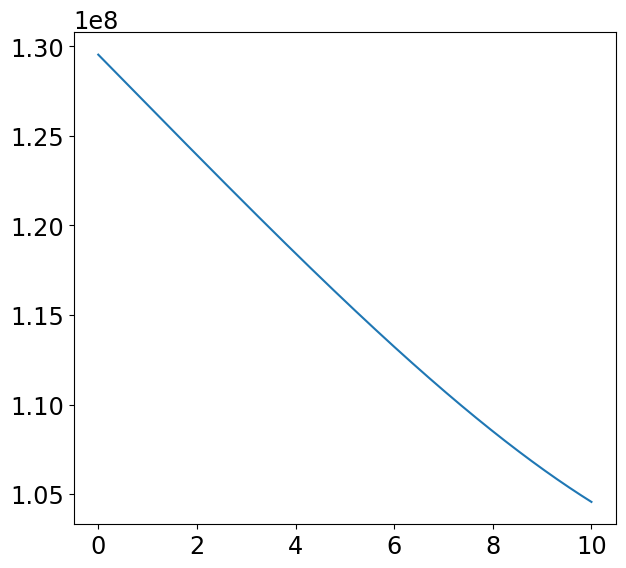

In [ ]:
rho_shap_del_add = load_data_from_pickle(f'rho_shap_gamma.pkl')
plt.plot(times, rho_shap_del_add)
plt.show()

In [ ]:
rho_shap_new

array([1.01965943e+08, 1.01963810e+08, 1.01961677e+08, ...,
       1.13332966e+08, 1.13339653e+08, 1.13346341e+08])

In [ ]:
## computing through data saved in files
'''
HT = [] ## partial derivatives matrix (transpose)
for key in dx_values.keys():
  # rho_shap_del_sub = load_data_from_pickle(f'rho_shap_{key}_sub.pkl')
  rho_shap_del_add = load_data_from_pickle(f'rho_shap_{key}_add_0.pkl')
  HT.append((rho_shap_del_add-rho_shap_new)/(dx_values[key]))
JT = np.asarray(HT)
J = np.transpose(HT) ## Jacobian
'''

In [ ]:
## computing through data saved in files
HT = [] ## partial derivatives matrix (transpose)
for key in dx_values.keys():
  # rho_shap_del_sub = load_data_from_pickle(f'rho_shap_{key}_sub.pkl')
  rho_shap_del_add = load_data_from_pickle(f'rho_shap_{key}_add_0.pkl')
  rho_shap_del_sub = load_data_from_pickle(f'rho_shap_{key}_sub_0.pkl')
  HT.append((rho_shap_del_add-rho_shap_del_sub)/(2*dx_values[key]))
JT = np.asarray(HT)
J = np.transpose(HT) ## Jacobian

In [ ]:
np.shape(J)

(4800, 15)

In [ ]:
np.shape(JT)
# save_data_to_pickle('jacobian_JT.pkl', JT)
print(JT)

[[ 6.90883547e-01  6.90912679e-01  6.90942034e-01 ... -1.92587294e+00
  -1.92711487e+00 -1.92835681e+00]
 [ 7.22461566e-01  7.22433925e-01  7.22406358e-01 ... -3.27831835e+00
  -3.28005686e+00 -3.28179531e+00]
 [ 2.69620121e-02  2.69515067e-02  2.69407034e-02 ... -2.52358124e+00
  -2.52470158e+00 -2.52582170e+00]
 ...
 [ 2.07237899e+04  2.07245350e+04  2.07409263e+04 ...  3.60177858e+11
   3.60344564e+11  3.60511276e+11]
 [-2.23517418e-03 -2.98023224e-03 -2.23517418e-03 ... -7.41882622e+03
  -7.42213652e+03 -7.42544755e+03]
 [ 3.49432230e+00  3.49283218e+00  3.49283218e+00 ... -9.10737365e+03
  -9.11143869e+03 -9.11550298e+03]]


In [ ]:
W=(np.identity((4800)) * ((10e-4)**2))
print(W.shape)
print(J.shape)
# WJ=np.matmul(W,J)
WJ = W@J
print(WJ.shape)
print(JT.shape)
Y = np.matmul(JT, WJ)
print(Y.shape)
# XX = getMatrixInverse(Y)
cov = np.linalg.inv((Y)) #covariance matrix
cov_vec = np.diag(cov) #variance vector (diagonal elements of cov)
print(np.sqrt(cov_vec))#sqrt of diagonal of cov matrix

corr = np.ones_like(cov) #correlation vector
for i in range(cov.shape[0]-1):
    for j in range(i+1,cov.shape[1]):
        corr[i][j] = cov[i][j]/np.sqrt(np.abs(cov_vec[j]*cov_vec[i]))
        corr[j][i] = corr[i][j]*1.

print(np.shape(corr))
print(cov_vec)#diagonal of cov matrix

(4800, 4800)
(4800, 15)
(4800, 15)
(15, 4800)
(15, 15)
[1.60319693e+07 1.96933327e+07 2.01303978e+07 4.00880653e+08
 1.09336276e+08 4.68607428e+08 2.75054805e+07 2.06769082e+07
 2.79452879e+07 3.62587968e+08 1.60753869e+08 7.36257439e+08
 3.00247387e-03 2.33254377e+03 2.70136343e+03]
(15, 15)
[2.57024040e+14 3.87827354e+14 4.05232917e+14 1.60705298e+17
 1.19544213e+16 2.19592922e+17 7.56551459e+14 4.27534531e+14
 7.80939115e+14 1.31470035e+17 2.58418064e+16 5.42075016e+17
 9.01484935e-06 5.44076042e+06 7.29736436e+06]


In [ ]:
parameters = dx_values.keys()

Text(0.5, 1.0, 'Correlation Matrix for Range')

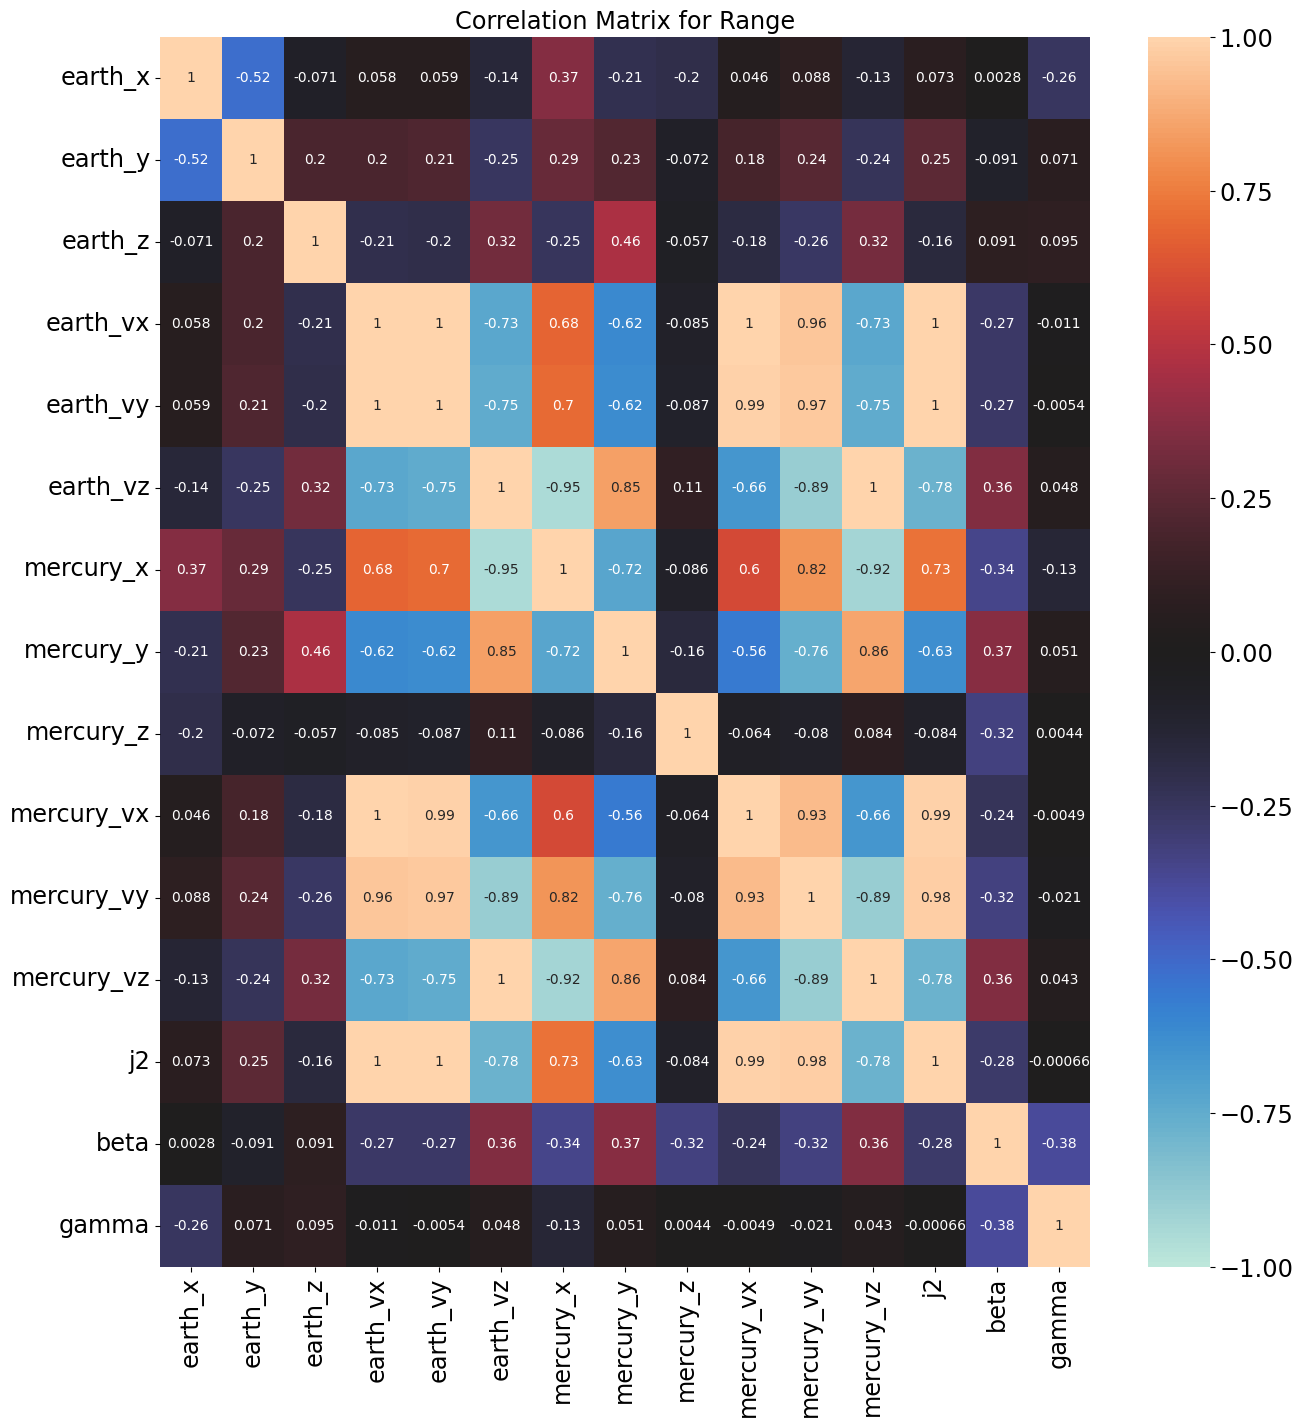

In [ ]:

# xx = np.matmul(JT,WJ)
# xx.shape
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(corr,vmin=-1, vmax=1, center=0, annot = True, xticklabels=parameters, yticklabels=parameters
)
plt.title("Correlation Matrix for Range")
# xx_dia = np.diag(xx)
# print(xx_dia)

Text(0.5, 1.0, 'Covariance Matrix for Range')

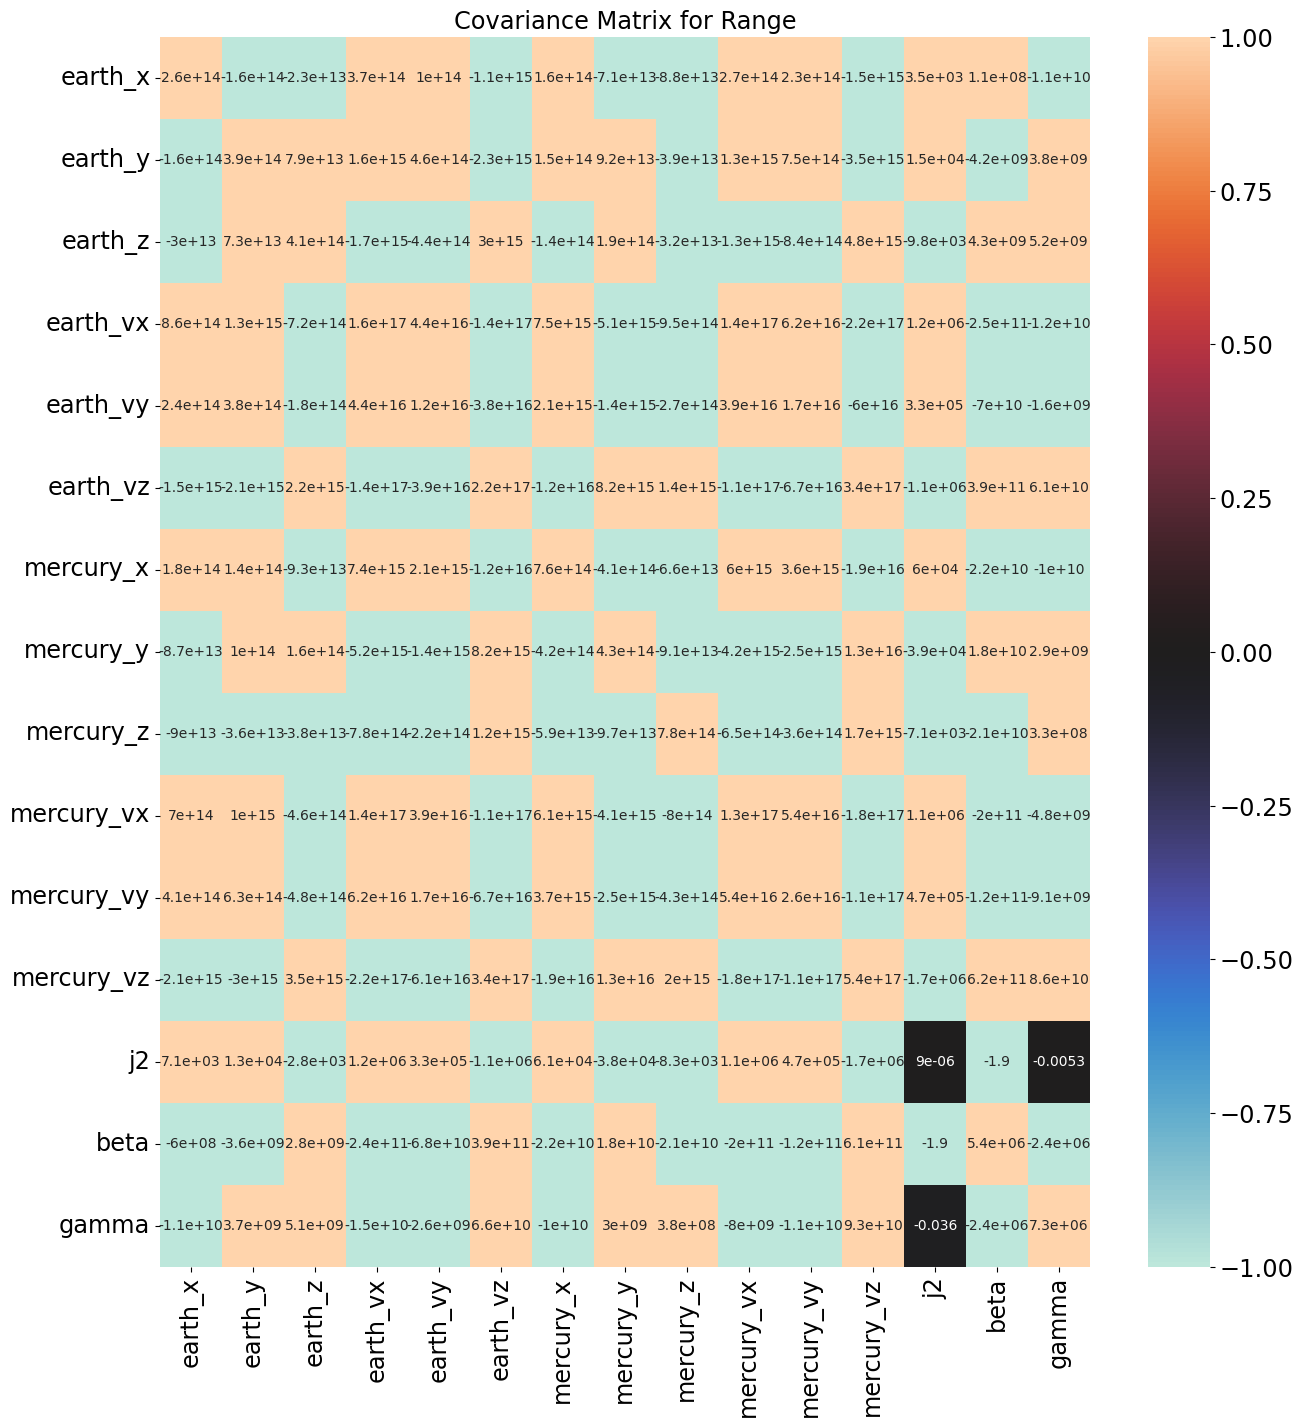

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(cov,vmin=-1, vmax=1, center=0, annot = True, xticklabels=dx_values.keys(), yticklabels=dx_values.keys()
)
plt.title("Covariance Matrix for Range")


# Computing partial derivatives for Doppler

In [ ]:
### Computing for Doppler from pkl files
Do_HT = [] ## partial derivatives matrix (transpose)
for key in dx_values.keys():
  rho_shap_del_sub = load_data_from_pickle(f'rho_shap_{key}_sub_0.pkl')
  rho_shap_del_add = load_data_from_pickle(f'rho_shap_{key}_add_0.pkl')
  dop_rho_sub = doppler_func(rho_shap_del_sub)
  dop_rho_add = doppler_func(rho_shap_del_add)
  Do_HT.append((np.array(dop_rho_add)-np.array(dop_rho_sub))/(2*dx_values[key]))
JTo = np.asarray(Do_HT)
Jo = np.transpose(Do_HT) ## Jacobian for doppler

In [ ]:
np.shape(Jo)

(4799, 15)

In [ ]:
W=(np.identity((4799)) * ((1.2e-8)*86400)**2)
print(W.shape)
print(Jo.shape)
WJo=np.matmul(W,Jo)
covO = np.linalg.inv(np.matmul(JTo,WJo)) #covariance matrix
cov_vecO = np.diag(covO) #variance vector (diagonal elements of cov)
print(np.sqrt(cov_vecO))#sqrt of diagonal of cov

corr = np.ones_like(covO) #correlation vector
for i in range(covO.shape[0]-1):
    for j in range(i+1,covO.shape[1]):
        corr[i][j] = covO[i][j]/np.sqrt(np.abs(cov_vecO[j]*cov_vecO[i]))
        corr[j][i] = corr[i][j]*1.

print(np.shape(corr))
print(cov_vec)#diagonal of cov

(4799, 4799)
(4799, 15)
[7.55513453e+04 7.66262123e+04 7.63818185e+04 4.59512669e+06
 1.21921136e+06 1.40874912e+06 7.50028871e+04 7.48517272e+04
 7.93033883e+04 4.59752502e+06 1.23455684e+06 2.18327226e+06
 3.16392533e-05 7.72898166e+00 7.75146218e+00]
(15, 15)
[2.57024040e+14 3.87827354e+14 4.05232917e+14 1.60705298e+17
 1.19544213e+16 2.19592922e+17 7.56551459e+14 4.27534531e+14
 7.80939115e+14 1.31470035e+17 2.58418064e+16 5.42075016e+17
 9.01484935e-06 5.44076042e+06 7.29736436e+06]


Text(0.5, 1.0, 'Correlation Matrix for Doppler Effect')

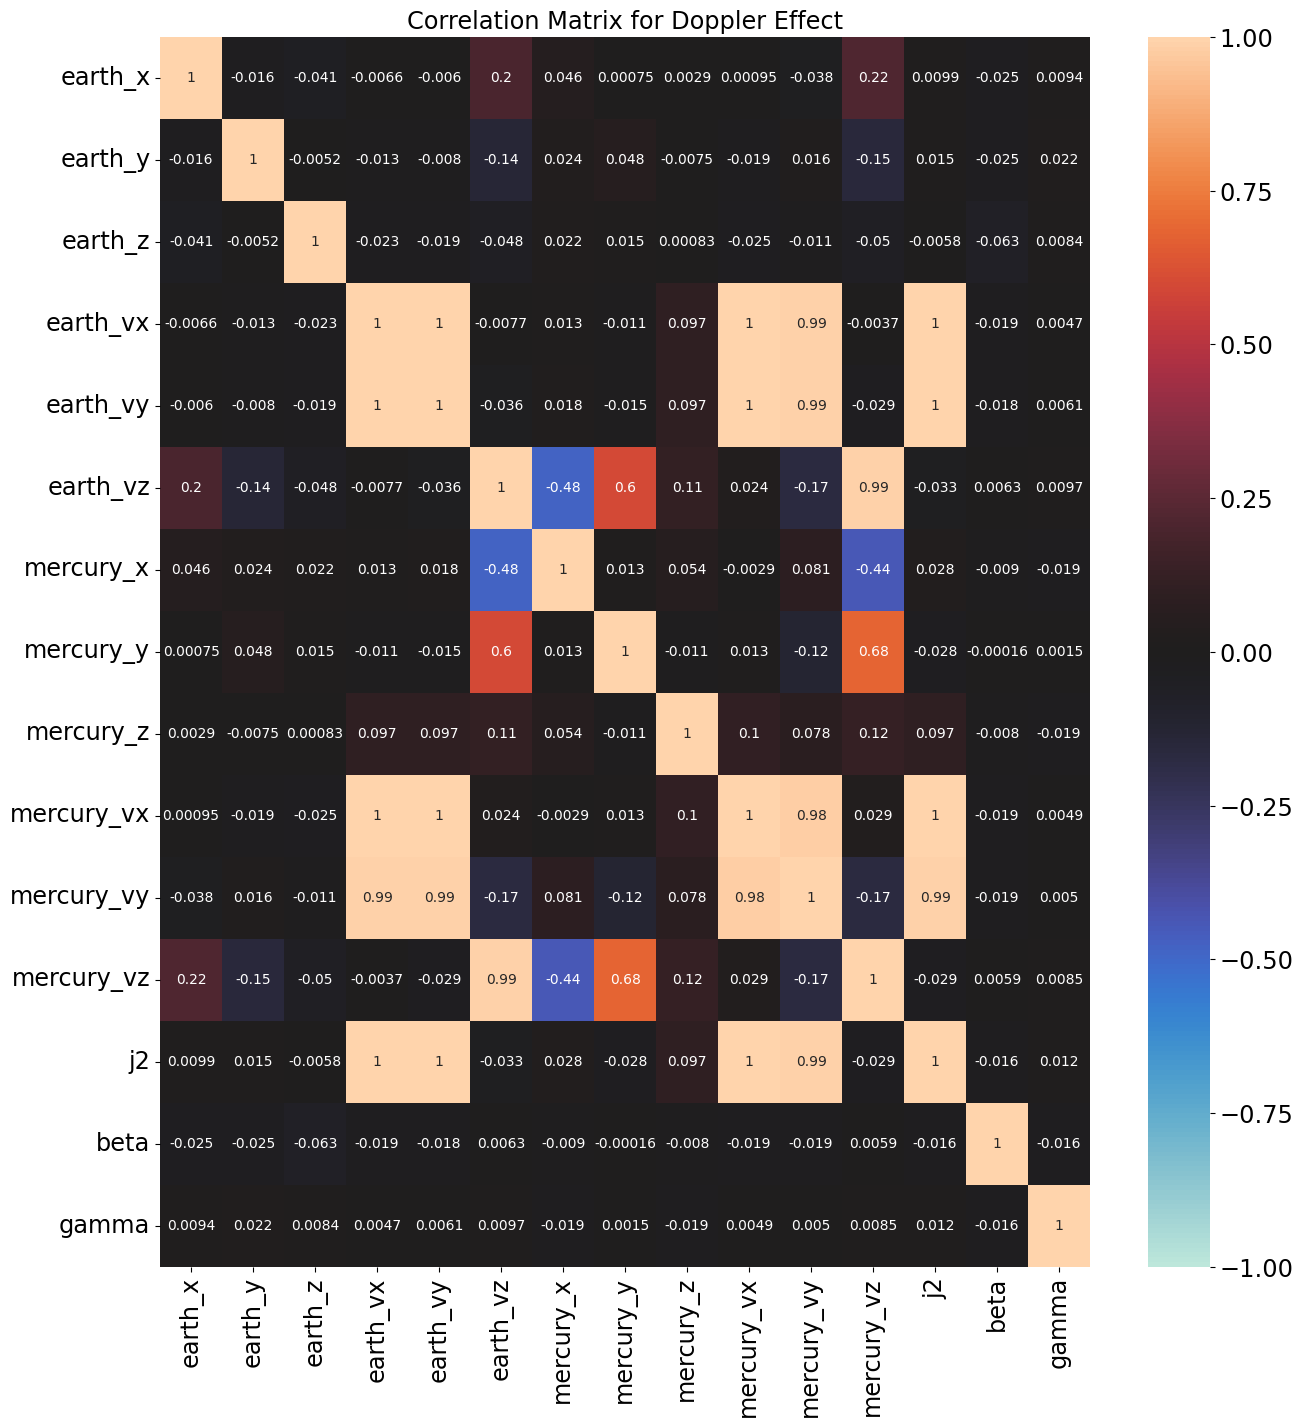

In [ ]:
parameters = dx_values.keys()
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(corr,vmin=-1, vmax=1, center=0, annot = True, xticklabels=parameters, yticklabels=parameters
)
plt.title("Correlation Matrix for Doppler Effect")


Text(0.5, 1.0, 'Covariance Matrix for Doppler Effect')

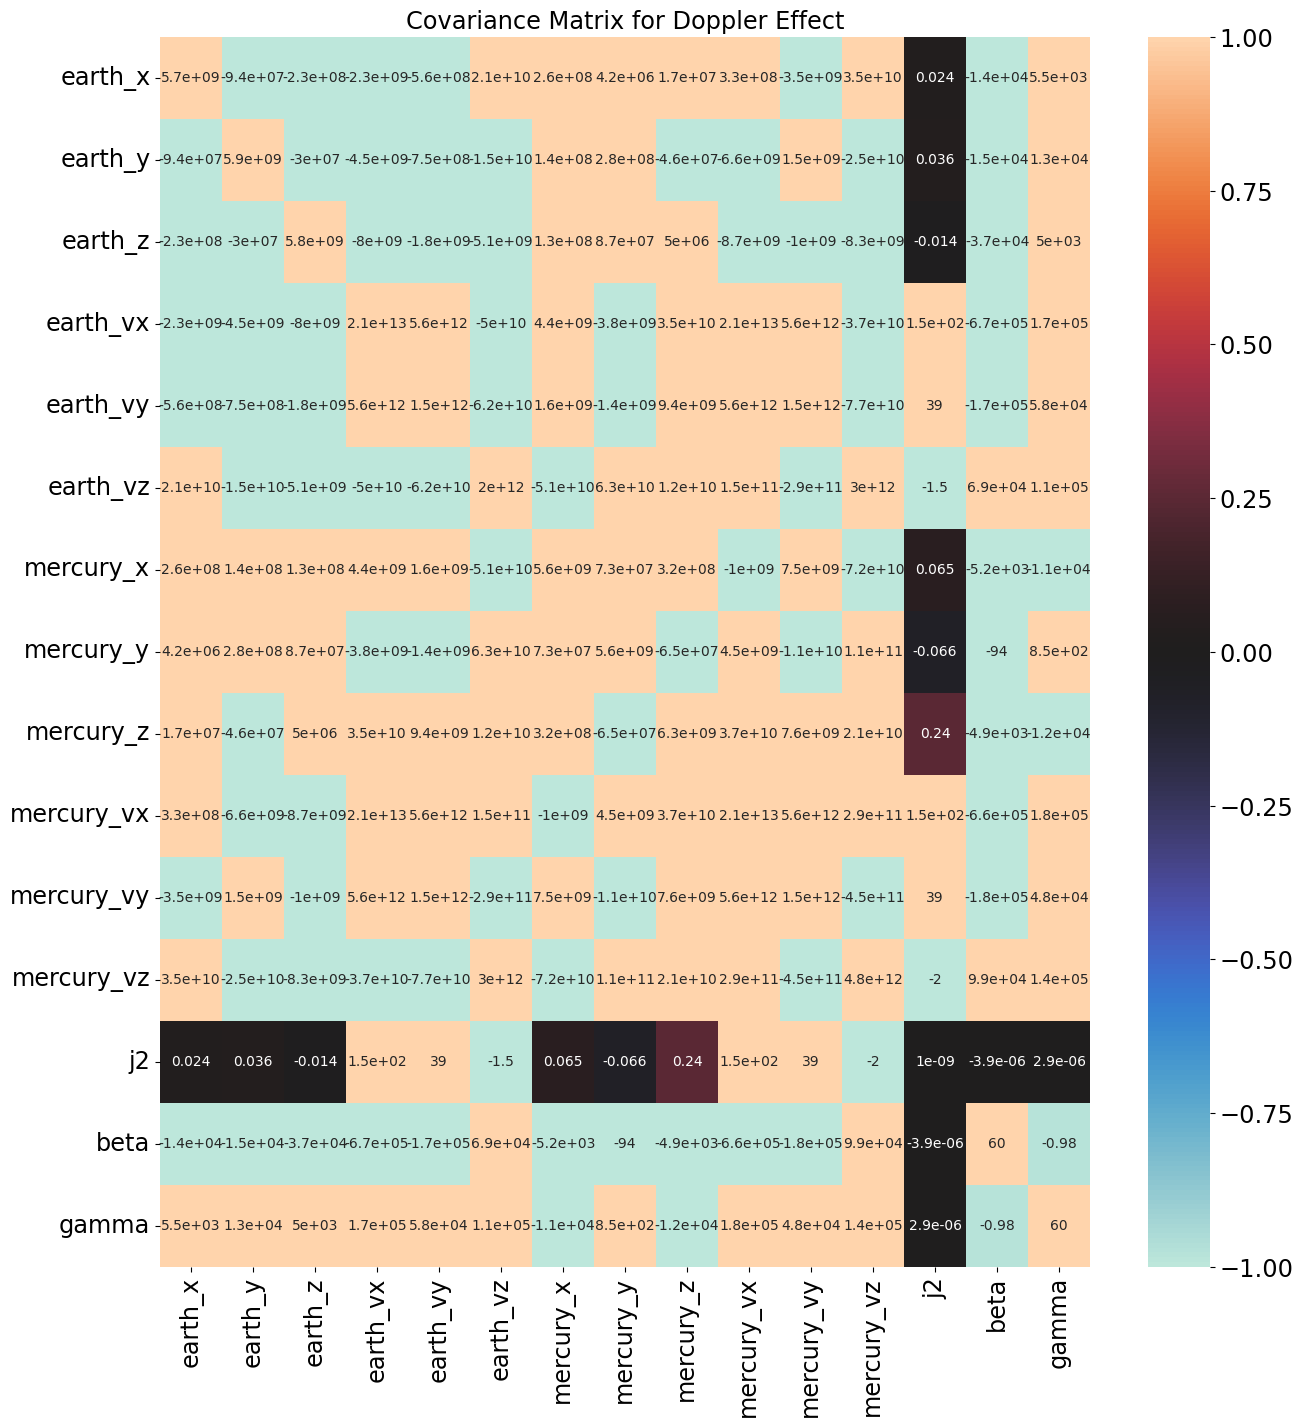

In [ ]:
parameters = dx_values.keys()
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(covO,vmin=-1, vmax=1, center=0, annot = True, xticklabels=parameters, yticklabels=parameters
)
plt.title("Covariance Matrix for Doppler Effect")